In [1]:
import numpyro
from numpyro.infer import MCMC, NUTS, init_to_median, Predictive
import numpyro.distributions as dist
from numpyro.infer.util import log_likelihood
import jax
import jax.numpy as jnp
from jax import random
import arviz as az
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
numpyro.util.enable_x64(True)

In [3]:
# Import and prepare data
data = pd.read_csv('../datasets/model_dataset.csv')
dataset = data.query('year >= 2011').copy()
# dataset = data.copy()
dataset["exp"] = (dataset["exp"] - dataset["exp"].mean()) / dataset["exp"].std()
dataset["age"] = (dataset["age"] - dataset["age"].mean()) / dataset["age"].std()
dataset["tenure"] = (dataset["tenure"] - dataset["tenure"].mean()) / dataset["tenure"].std()

In [4]:
# Prepare data for running the model
X = dataset[["exp","sex","elementary_edu", "highschool_edu", "postsec_edu",
             "undergrad_edu", "graduate_edu", "age", "tenure", "union",
             "part_time", "public_sector", "public_sector", "self_emp",
             "grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
y = dataset["salary"].values
ind = pd.factorize(dataset["industry"])[0]

In [5]:
def model(X, y):
    # Priors
    avg_salary = numpyro.sample("avg_salary", dist.Normal(10, 10))
    beta_exp = numpyro.sample("beta_exp", dist.Normal(0, 10))
    beta_sex = numpyro.sample("beta_sex", dist.Normal(0, 10))
    beta_elementary_edu = numpyro.sample("beta_elementary_edu", dist.Normal(0, 10))
    beta_highschool_edu = numpyro.sample("beta_highschool_edu", dist.Normal(0, 10))
    beta_postsec_edu = numpyro.sample("beta_postsec_edu", dist.Normal(0, 10))
    beta_undergrad_edu = numpyro.sample("beta_undergrad_edu", dist.Normal(0, 10))
    beta_graduate_edu = numpyro.sample("beta_graduate_edu", dist.Normal(0, 10))
    beta_age = numpyro.sample("beta_age", dist.Normal(0, 10))
    beta_tenure = numpyro.sample("beta_tenure", dist.Normal(0, 10))
    beta_union = numpyro.sample("beta_union", dist.Normal(0, 10))
    beta_part_time = numpyro.sample("beta_part_time", dist.Normal(0, 10))
    beta_public_sector = numpyro.sample("beta_public_sector", dist.Normal(0, 10))
    beta_self_emp = numpyro.sample("beta_self_emp", dist.Normal(0, 10))
    beta_grad_highschool_refyear = numpyro.sample("beta_grad_highschool_refyear", dist.Normal(0, 10))
    beta_grad_college_refyear = numpyro.sample("beta_grad_college_refyear", dist.Normal(0, 10))
    beta_grad_univ_refyear = numpyro.sample("beta_grad_univ_refyear", dist.Normal(0, 10))
    shape = numpyro.sample("shape", dist.Uniform(0, 10))


    # Expected value
    mu = (avg_salary + beta_exp * X[:,0] + beta_sex * X[:,1] + beta_elementary_edu * X[:,2]
         + beta_highschool_edu * X[:,3] + beta_postsec_edu * X[:,4] + beta_undergrad_edu * X[:,5]
            + beta_graduate_edu * X[:,6] + beta_age * X[:,7] + beta_tenure * X[:,8] + beta_union * X[:,9]
            + beta_part_time * X[:,10] + beta_public_sector * X[:,11] + beta_self_emp * X[:,12]
            + beta_grad_highschool_refyear * X[:,13] + beta_grad_college_refyear * X[:,14]
            + beta_grad_univ_refyear * X[:,15])
    mu = jnp.exp(mu)
    rate = shape/mu

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)

def hierarchical(X, y, ind):
    # Hyperpriors
    mu_avg_salary = numpyro.sample("mu_avg_salary", dist.Normal(10, 3))
    sigma_avg_salary = numpyro.sample("sigma_avg_salary", dist.HalfNormal(3))
    mu_beta_exp = numpyro.sample("mu_beta_exp", dist.Normal(0, 3))
    sigma_beta_exp = numpyro.sample("sigma_beta_exp", dist.HalfNormal(3))
    mu_beta_sex = numpyro.sample("mu_beta_sex", dist.Normal(0, 3))
    sigma_beta_sex = numpyro.sample("sigma_beta_sex", dist.HalfNormal(3))
    mu_beta_elementary_edu = numpyro.sample("mu_beta_elementary_edu", dist.Normal(0, 3))
    sigma_beta_elementary_edu = numpyro.sample("sigma_beta_elementary_edu", dist.HalfNormal(3))
    mu_beta_highschool_edu = numpyro.sample("mu_beta_highschool_edu", dist.Normal(0, 3))
    sigma_beta_highschool_edu = numpyro.sample("sigma_beta_highschool_edu", dist.HalfNormal(3))
    mu_beta_postsec_edu = numpyro.sample("mu_beta_postsec_edu", dist.Normal(0, 3))
    sigma_beta_postsec_edu = numpyro.sample("sigma_beta_postsec_edu", dist.HalfNormal(3))
    mu_beta_undergrad_edu = numpyro.sample("mu_beta_undergrad_edu", dist.Normal(0, 3))
    sigma_beta_undergrad_edu = numpyro.sample("sigma_beta_undergrad_edu", dist.HalfNormal(3))
    mu_beta_graduate_edu = numpyro.sample("mu_beta_graduate_edu", dist.Normal(0, 3))
    sigma_beta_graduate_edu = numpyro.sample("sigma_beta_graduate_edu", dist.HalfNormal(3))
    mu_beta_age = numpyro.sample("mu_beta_age", dist.Normal(0, 3))
    sigma_beta_age = numpyro.sample("sigma_beta_age", dist.HalfNormal(3))
    mu_beta_tenure = numpyro.sample("mu_beta_tenure", dist.Normal(0, 3))
    sigma_beta_tenure = numpyro.sample("sigma_beta_tenure", dist.HalfNormal(3))
    mu_beta_union = numpyro.sample("mu_beta_union", dist.Normal(0, 3))
    sigma_beta_union = numpyro.sample("sigma_beta_union", dist.HalfNormal(3))
    mu_beta_part_time = numpyro.sample("mu_beta_part_time", dist.Normal(0, 3))
    sigma_beta_part_time = numpyro.sample("sigma_beta_part_time", dist.HalfNormal(3))
    mu_beta_public_sector = numpyro.sample("mu_beta_public_sector", dist.Normal(0, 3))
    sigma_beta_public_sector = numpyro.sample("sigma_beta_public_sector", dist.HalfNormal(3))
    mu_beta_self_emp = numpyro.sample("mu_beta_self_emp", dist.Normal(0, 3))
    sigma_beta_self_emp = numpyro.sample("sigma_beta_self_emp", dist.HalfNormal(3))
    mu_beta_grad_highschool_refyear = numpyro.sample("mu_beta_grad_highschool_refyear", dist.Normal(0, 3))
    sigma_beta_grad_highschool_refyear = numpyro.sample("sigma_beta_grad_highschool_refyear", dist.HalfNormal(3))
    mu_beta_grad_college_refyear = numpyro.sample("mu_beta_grad_college_refyear", dist.Normal(0, 3))
    sigma_beta_grad_college_refyear = numpyro.sample("sigma_beta_grad_college_refyear", dist.HalfNormal(3))
    mu_beta_grad_univ_refyear = numpyro.sample("mu_beta_grad_univ_refyear", dist.Normal(0, 3))
    sigma_beta_grad_univ_refyear = numpyro.sample("sigma_beta_grad_univ_refyear", dist.HalfNormal(3))

    # Priors
    with numpyro.plate("industry", ind.max() + 1):
        avg_salary_offset = numpyro.sample("offset_avg_salary", dist.Normal(0, 1))
        avg_salary = numpyro.deterministic("avg_salary", mu_avg_salary + sigma_avg_salary * avg_salary_offset)
        beta_exp_offset = numpyro.sample("offset_beta_exp", dist.Normal(0, 1))
        beta_exp = numpyro.deterministic("beta_exp", mu_beta_exp + sigma_beta_exp * beta_exp_offset)
        beta_sex_offset = numpyro.sample("offset_beta_sex", dist.Normal(0, 1))
        beta_sex = numpyro.deterministic("beta_sex", mu_beta_sex + sigma_beta_sex * beta_sex_offset)
        beta_elementary_edu_offset = numpyro.sample("offset_beta_elementary_edu", dist.Normal(0, 1))
        beta_elementary_edu = numpyro.deterministic("beta_elementary_edu", mu_beta_elementary_edu + sigma_beta_elementary_edu * beta_elementary_edu_offset)
        beta_highschool_edu_offset = numpyro.sample("offset_beta_highschool_edu", dist.Normal(0, 1))
        beta_highschool_edu = numpyro.deterministic("beta_highschool_edu", mu_beta_highschool_edu + sigma_beta_highschool_edu * beta_highschool_edu_offset)
        beta_postsec_edu_offset = numpyro.sample("offset_beta_postsec_edu", dist.Normal(0, 1))
        beta_postsec_edu = numpyro.deterministic("beta_postsec_edu", mu_beta_postsec_edu + sigma_beta_postsec_edu * beta_postsec_edu_offset)
        beta_undergrad_edu_offset = numpyro.sample("offset_beta_undergrad_edu", dist.Normal(0, 1))
        beta_undergrad_edu = numpyro.deterministic("beta_undergrad_edu", mu_beta_undergrad_edu + sigma_beta_undergrad_edu * beta_undergrad_edu_offset)
        beta_graduate_edu_offset = numpyro.sample("offset_beta_graduate_edu", dist.Normal(0, 1))
        beta_graduate_edu = numpyro.deterministic("beta_graduate_edu", mu_beta_graduate_edu + sigma_beta_graduate_edu * beta_graduate_edu_offset)
        beta_age_offset = numpyro.sample("offset_beta_age", dist.Normal(0, 1))
        beta_age = numpyro.deterministic("beta_age", mu_beta_age + sigma_beta_age * beta_age_offset)
        beta_tenure_offset = numpyro.sample("offset_beta_tenure", dist.Normal(0, 1))
        beta_tenure = numpyro.deterministic("beta_tenure", mu_beta_tenure + sigma_beta_tenure * beta_tenure_offset)
        beta_union_offset = numpyro.sample("offset_beta_union", dist.Normal(0, 1))
        beta_union = numpyro.deterministic("beta_union", mu_beta_union + sigma_beta_union * beta_union_offset)
        beta_part_time_offset = numpyro.sample("offset_beta_part_time", dist.Normal(0, 1))
        beta_part_time = numpyro.deterministic("beta_part_time", mu_beta_part_time + sigma_beta_part_time * beta_part_time_offset)
        beta_public_sector_offset = numpyro.sample("offset_beta_public_sector", dist.Normal(0, 1))
        beta_public_sector = numpyro.deterministic("beta_public_sector", mu_beta_public_sector + sigma_beta_public_sector * beta_public_sector_offset)
        beta_self_emp_offset = numpyro.sample("offset_beta_self_emp", dist.Normal(0, 1))
        beta_self_emp = numpyro.deterministic("beta_self_emp", mu_beta_self_emp + sigma_beta_self_emp * beta_self_emp_offset)
        beta_grad_highschool_refyear_offset = numpyro.sample("offset_beta_grad_highschool_refyear", dist.Normal(0, 1))
        beta_grad_highschool_refyear = numpyro.deterministic("beta_grad_highschool_refyear", mu_beta_grad_highschool_refyear + sigma_beta_grad_highschool_refyear * beta_grad_highschool_refyear_offset)
        beta_grad_college_refyear_offset = numpyro.sample("offset_beta_grad_college_refyear", dist.Normal(0, 1))
        beta_grad_college_refyear = numpyro.deterministic("beta_grad_college_refyear", mu_beta_grad_college_refyear + sigma_beta_grad_college_refyear * beta_grad_college_refyear_offset)
        beta_grad_univ_refyear_offset = numpyro.sample("offset_beta_grad_univ_refyear", dist.Normal(0, 1))
        beta_grad_univ_refyear = numpyro.deterministic("beta_grad_univ_refyear", mu_beta_grad_univ_refyear + sigma_beta_grad_univ_refyear * beta_grad_univ_refyear_offset)
    shape = numpyro.sample("shape", dist.Uniform(0, 10))

    # Expected value
    mu = (avg_salary[ind] + beta_exp[ind] * X[:,0] + beta_sex[ind] * X[:,1] + beta_elementary_edu[ind] * X[:,2]
         + beta_highschool_edu[ind] * X[:,3] + beta_postsec_edu[ind] * X[:,4] + beta_undergrad_edu[ind] * X[:,5]
            + beta_graduate_edu[ind] * X[:,6] + beta_age[ind] * X[:,7] + beta_tenure[ind] * X[:,8] + beta_union[ind] * X[:,9]
            + beta_part_time[ind] * X[:,10] + beta_public_sector[ind] * X[:,11] + beta_self_emp[ind] * X[:,12]
            + beta_grad_highschool_refyear[ind] * X[:,13] + beta_grad_college_refyear[ind] * X[:,14]
            + beta_grad_univ_refyear[ind] * X[:,15])
    mu = jnp.exp(mu) + 1e-6
    rate = shape/(mu + 1e-6)

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)


## Normal sampling

In [ ]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(model, target_accept_prob=0.95)
mcmc = MCMC(kernel, num_warmup=2000, num_samples=2000, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y)

In [11]:
trace = az.from_numpyro(mcmc)
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
az.summary(az.from_numpyro(mcmc), round_to=5)

mean       sd   hdi_3%   hdi_97%  mcse_mean  \
avg_salary                    2.61006  4.88530 -0.76399  11.16947    2.43215   
beta_age                      0.07888  0.07600  0.00027   0.18154    0.03785   
beta_elementary_edu          -1.21169  0.53735 -1.69928  -0.14180    0.26088   
beta_exp                     -0.45651  0.81706 -1.85005   0.15096    0.40688   
beta_grad_college_refyear    -0.32706  1.13145 -1.92992   1.21848    0.56287   
beta_grad_highschool_refyear -0.99213  0.64530 -1.70982  -0.07788    0.32123   
beta_grad_univ_refyear       -0.30490  1.05118 -1.86470   1.09578    0.52335   
beta_graduate_edu            -0.13904  0.99284 -1.84244   0.60454    0.49100   
beta_highschool_edu           0.03504  0.55043 -0.74601   0.56503    0.26795   
beta_part_time               -0.99009  0.22484 -1.28806  -0.72381    0.11179   
beta_postsec_edu             -0.64826  0.59789 -1.57994   0.20859    0.29207   
beta_public_sector            0.32842  1.27065 -2.11579   2.86668    0.34013   
beta_self_emp                 0.09198  1.45605 -2.65124   2.31386    0.49731   
beta_sex                      0.50094  0.48752 -0.26943   0.97265    0.24276   
beta_tenure                   0.11402  0.07278  0.00084   0.18931    0.03625   
beta_undergrad_edu           -0.67110  0.78371 -1.79438   0.49677    0.38594   
beta_union                   -0.10985  1.02048 -1.27877   1.44602    0.50818   
shape                         4.90152  2.22902  2.21064   8.40634    1.10984   

                              mcse_sd  ess_bulk  ess_tail    r_hat  
avg_salary                    1.86216   4.32385   4.03226  3.98837  
beta_age                      0.02898   4.31340  28.81971  9.41754  
beta_elementary_edu           0.20389   4.32303   4.03226  3.99089  
beta_exp                      0.31155   4.31843   4.03226  9.05037  
beta_grad_college_refyear     0.43101   4.07994   4.03226  9.40090  
beta_grad_highschool_refyear  0.24605   4.31242   4.03226  3.98626  
beta_grad_univ_refyear        0.40080   4.08595   4.03226  9.40145  
beta_graduate_edu             0.37735   6.02337   4.03226  3.60934  
beta_highschool_edu           0.20437   4.17332   4.07497  5.60183  
beta_part_time                0.08565   4.32999   4.03226  7.60693  
beta_postsec_edu              0.22780   4.37555   4.03226  3.71255  
beta_public_sector            0.24572  11.36691  29.14467  1.85515  
beta_self_emp                 0.36437  10.14504  29.16365  2.28643  
beta_sex                      0.18588   4.31372  27.92230  3.98562  
beta_tenure                   0.02775   4.31550  28.61454  3.98632  
beta_undergrad_edu            0.29813   4.32959   4.03226  3.96843  
beta_union                    0.38912   4.08001   4.03226  9.40331  
shape                         0.84982   4.21605   4.03226  9.43688

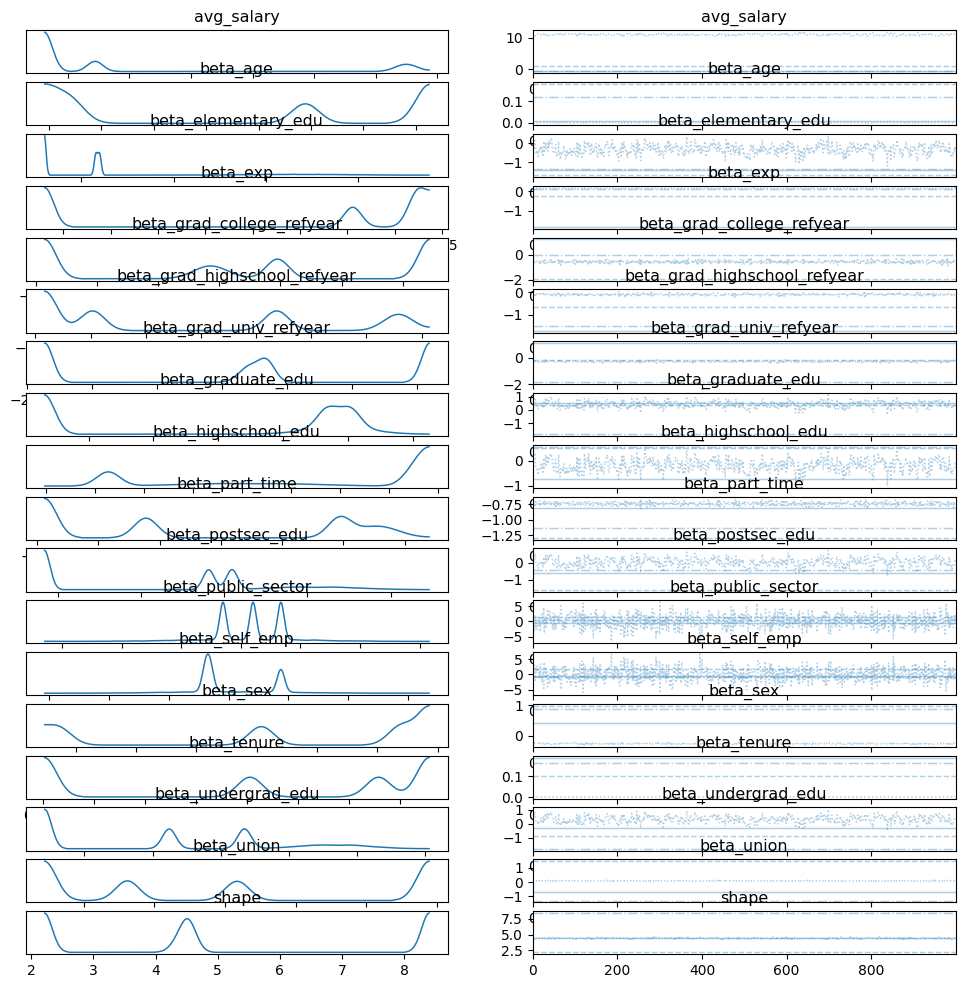

In [13]:
az.plot_trace(az.from_numpyro(mcmc), combined=True, figsize=(12, 12));

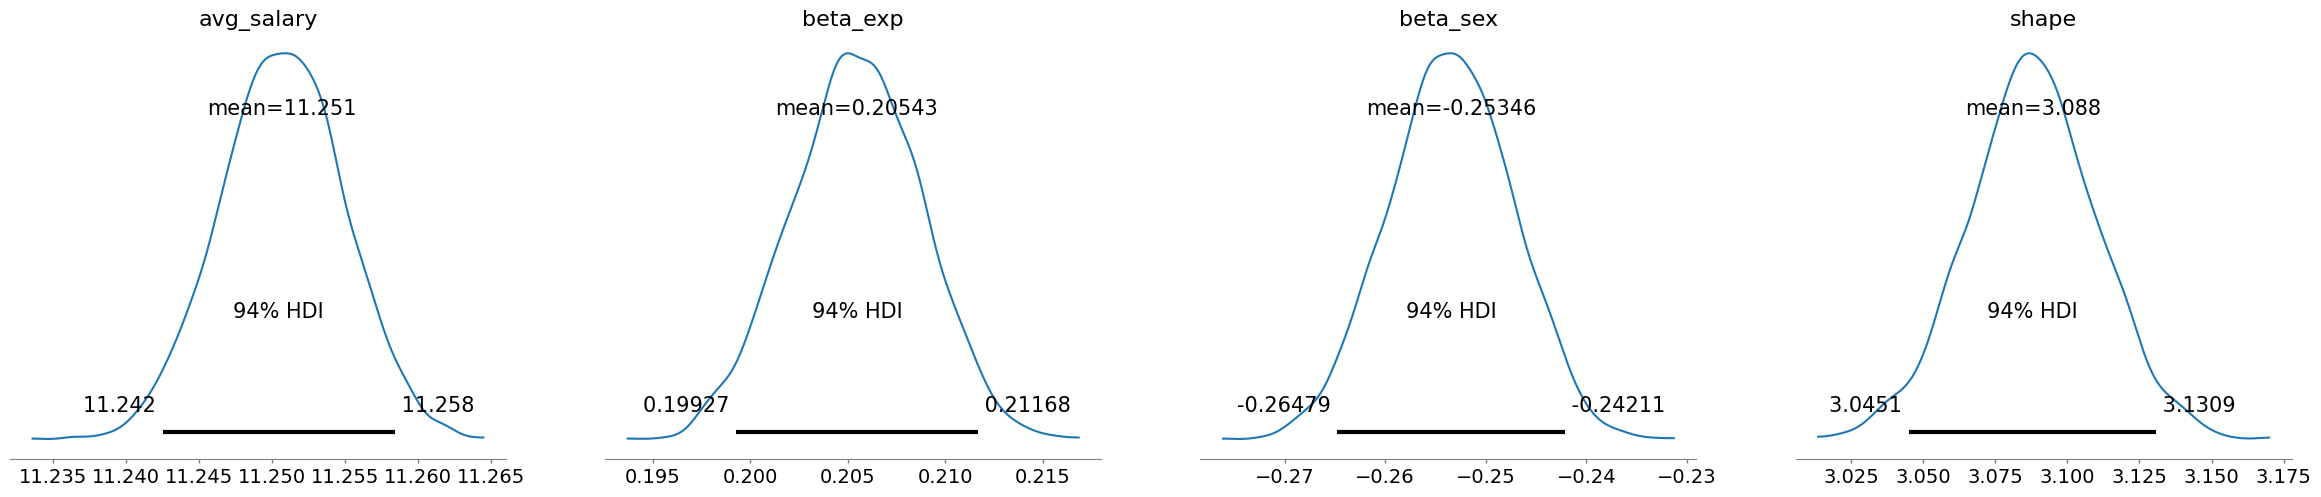

In [137]:
az.plot_posterior(az.from_numpyro(mcmc), round_to=5);

## Sequential sampling

In [6]:
def concat_samples(samples):
    for key in samples[0]:
        samples[0][key] = jnp.concatenate([samples[0][key], samples[1][key]], axis=1)
    return samples[0]

In [7]:
def create_inference_data_nodim(mcmc,
                          samples, 
                          divergences, 
                          loglikelihood, 
                          dimension_name, 
                          dimension,
                          target):
    trace = az.from_numpyro(mcmc)
    chains, draws = samples["avg_salary"].shape
    print(chains, draws)
    obs = target.shape[0]

    posterior_dataset = xr.Dataset(
        data_vars = { var: (["chain", "draw"], samples[var]) for var in samples.keys() },
        coords = { "chain": np.arange(chains), "draw": np.arange(draws) },
        attrs = trace.posterior.attrs,
    )
    loglike_dataset = xr.Dataset(
        data_vars=dict(log_likelihood=(["chain", "draw", "obs"], loglikelihood)),
        coords=dict(chain=np.arange(chains), draw=np.arange(draws), obs=np.arange(obs)),
        attrs=trace.log_likelihood.attrs
    )
    sample_stats = xr.Dataset(
        data_vars=dict(diverging=(["chain", "draw"], divergences)),
        coords=dict(chain=np.arange(chains),draw=np.arange(draws)),
        attrs=trace.sample_stats.attrs,
    )
    observed_data = xr.Dataset(
        data_vars=dict(salary=(["obs"], target)),
        coords=dict(obs=np.arange(obs)),
        attrs=trace.observed_data.attrs,
    )

    return az.InferenceData(posterior=posterior_dataset,
                 log_likelihood=loglike_dataset,
                 sample_stats=sample_stats,
                 observed_data=observed_data)

def create_inference_data(mcmc,
                          samples, 
                          divergences, 
                          loglikelihood, 
                          dimension_name, 
                          dimension,
                          target):
    trace = az.from_numpyro(mcmc)
    chains, draws, dim = samples["avg_salary"].shape
    obs = target.shape[0]

    posterior_dataset = xr.Dataset(
        data_vars = { var: (["chain", "draw", f"{dimension_name}"], samples[var]) 
                     if len(samples[var].shape)==3 else (["chain", "draw"], samples[var])
                     for var in samples.keys()  },
        coords = { "chain": np.arange(chains), "draw": np.arange(draws), f"{dimension_name}": dimension },
        attrs = trace.posterior.attrs,
    )
    loglike_dataset = xr.Dataset(
        data_vars=dict(log_likelihood=(["chain", "draw", "obs"], loglikelihood)),
        coords=dict(chain=np.arange(chains), draw=np.arange(draws), obs=np.arange(obs)),
        attrs=trace.log_likelihood.attrs
    )
    sample_stats = xr.Dataset(
        data_vars=dict(diverging=(["chain", "draw"], divergences)),
        coords=dict(chain=np.arange(chains),draw=np.arange(draws)),
        attrs=trace.sample_stats.attrs,
    )
    observed_data = xr.Dataset(
        data_vars=dict(salary=(["obs"], target)),
        coords=dict(obs=np.arange(obs)),
        attrs=trace.observed_data.attrs,
    )

    return az.InferenceData(posterior=posterior_dataset,
                 log_likelihood=loglike_dataset,
                 sample_stats=sample_stats,
                 observed_data=observed_data)

In [15]:
import pickle
def save_model_pickle(mcmc, outputs_path):
    """
    Save model pickle
    """
    with open(fr"{outputs_path}/model.pickle", "wb") as output_file:
        pickle.dump(mcmc, output_file)

In [16]:
iterations = 10
samples = None
divergences = None
logll = None
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(hierarchical, target_accept_prob=0.98, dense_mass=True, max_tree_depth=12, init_strategy=init_to_median(num_samples=100))
mcmc = MCMC(kernel, num_warmup=200, num_samples=200, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y, ind)
samples = { key: jnp.array(value) for key, value in mcmc.get_samples(group_by_chain=True).items() }
divergences = jnp.array(mcmc.get_extra_fields(group_by_chain=True)["diverging"])
logll = jnp.array(log_likelihood(hierarchical, mcmc.get_samples(), X, y, ind, batch_ndims=1)["salary_hat"].reshape(4, 200, -1))

samples = { key: jax.device_put(value, device=jax.devices("cpu")[0]) for key, value in samples.items() }
divergences = jax.device_put(divergences, jax.devices("cpu")[0])
logll = jax.device_put(logll, jax.devices("cpu")[0])
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)
max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
save_model_pickle(mcmc, "../outputs")
print(f">>>>>>>>>>>>>>>> Warmup complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")

for it in range(iterations):
    mcmc.post_warmup_state = mcmc.last_state
    mcmc.run(mcmc.post_warmup_state.rng_key, X, y, ind)
    samples = concat_samples([samples, mcmc.get_samples(group_by_chain=True)])
    divergences = jnp.concatenate([divergences, mcmc.get_extra_fields(group_by_chain=True)["diverging"]], axis=1)
    logll = jnp.concatenate([logll, log_likelihood(hierarchical, mcmc.get_samples(), X, y, ind, batch_ndims=1)["salary_hat"].reshape(4,200,-1)], axis=1)
    trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)
    max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
    save_model_pickle(mcmc, "../outputs")
    trace.to_netcdf(f"../outputs/trace_{it}.nc")
    print(f">>>>>>>>>>>>>>>> Iteration {it+1}/{iterations} complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")
    if max_rhat <= 1.01:
        print(f"Convergence reached iteration: {it}")
        break
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", range(ind.max()+1), y)

sample: 100%|██████████| 400/400 [23:28<00:00,  3.52s/it]


>>>>>>>>>>>>>>>> Warmup complete - max_rhat: 1.18372 <<<<<<<<<<<<<<<<<<<<


sample: 100%|██████████| 200/200 [12:41<00:00,  3.81s/it]


>>>>>>>>>>>>>>>> Iteration 1/10 complete - max_rhat: 1.10836 <<<<<<<<<<<<<<<<<<<<


sample: 100%|██████████| 200/200 [12:51<00:00,  3.86s/it]


>>>>>>>>>>>>>>>> Iteration 2/10 complete - max_rhat: 1.04841 <<<<<<<<<<<<<<<<<<<<


sample:  10%|█         | 20/200 [01:18<11:48,  3.94s/it]


KeyboardInterrupt: 

In [12]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [13]:
az.summary(trace, round_to=5)

mean       sd    hdi_3%   hdi_97%  mcse_mean  \
avg_salary[0]             11.11025  0.29915  10.49275  11.63279    0.09164   
avg_salary[1]             11.08431  0.23644  10.69829  11.52323    0.04513   
avg_salary[2]             10.98916  0.23595  10.59996  11.43721    0.02956   
avg_salary[3]             11.22011  0.24546  10.81917  11.73689    0.04709   
avg_salary[4]             11.16754  0.24330  10.76468  11.61151    0.03954   
...                            ...      ...       ...       ...        ...   
sigma_beta_self_emp        0.25467  0.32460   0.01833   0.53200    0.07871   
sigma_beta_sex             0.12627  0.28342   0.00662   0.22053    0.05358   
sigma_beta_tenure          0.10357  0.27762   0.01423   0.19529    0.05095   
sigma_beta_undergrad_edu   0.13677  0.27705   0.00232   0.21775    0.05495   
sigma_beta_union           0.16535  0.31392   0.03778   0.22276    0.05262   

                          mcse_sd  ess_bulk   ess_tail    r_hat  
avg_salary[0]             0.06666  10.34342   97.61512  1.32631  
avg_salary[1]             0.03226  27.44713  118.45008  1.11626  
avg_salary[2]             0.02100  66.06516  149.18985  1.05868  
avg_salary[3]             0.03371  26.86061  159.39431  1.11159  
avg_salary[4]             0.02818  33.91015  143.95669  1.10081  
...                           ...       ...        ...      ...  
sigma_beta_self_emp       0.05664   7.30254   28.44387  1.54090  
sigma_beta_sex            0.03829  10.20475   17.12924  1.31177  
sigma_beta_tenure         0.03639  10.36638   31.64299  1.30419  
sigma_beta_undergrad_edu  0.03931   7.71756   22.94208  1.48926  
sigma_beta_union          0.03752  47.10914   28.16484  1.04123  

[579 rows x 9 columns]

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (69), generating only 20 plots
  warnings.warn(


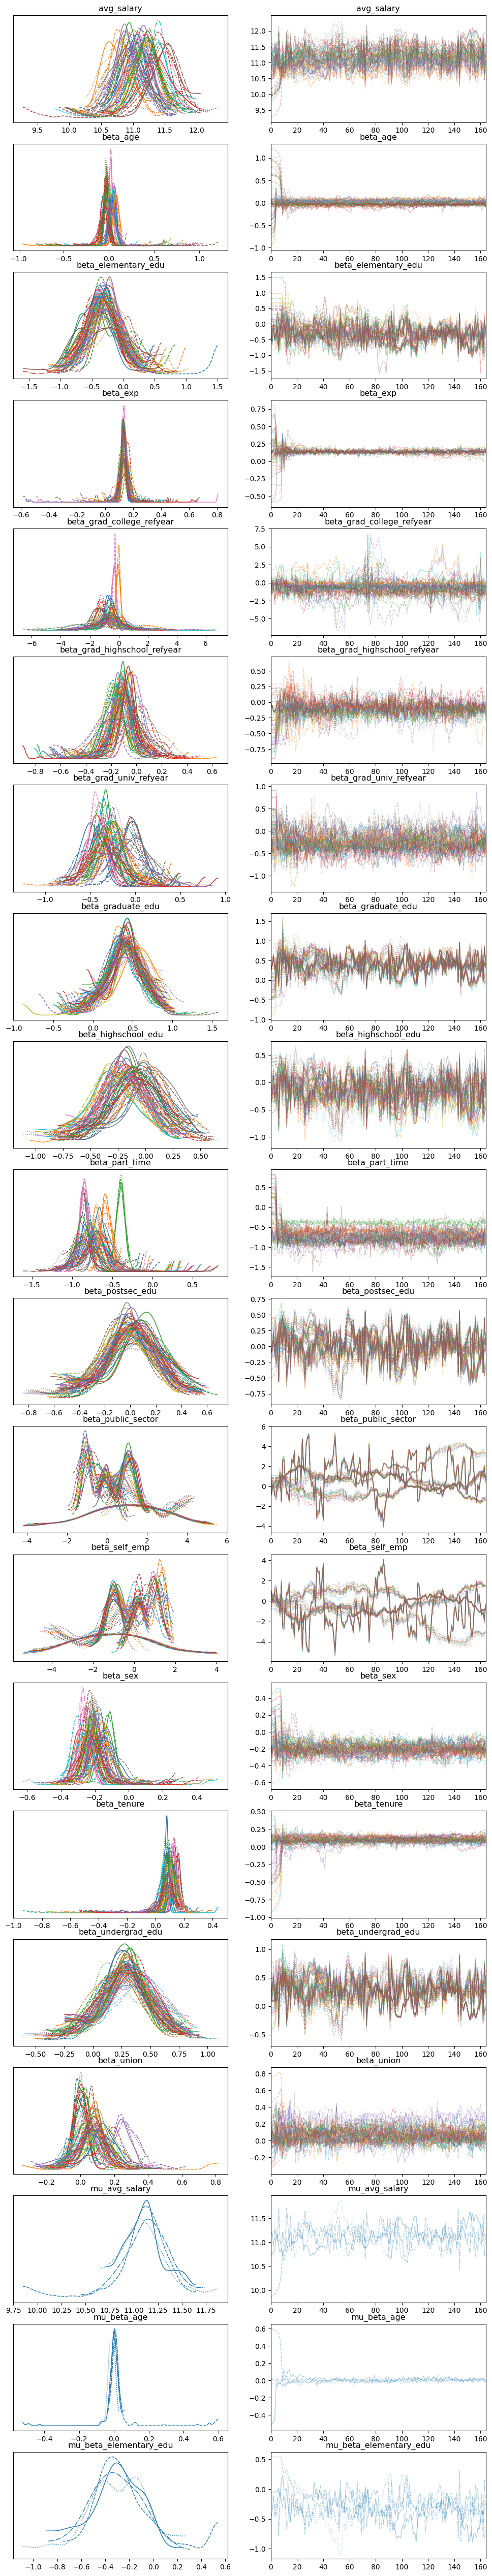

In [14]:
az.plot_trace(trace, combined=False, figsize=(12, 65));

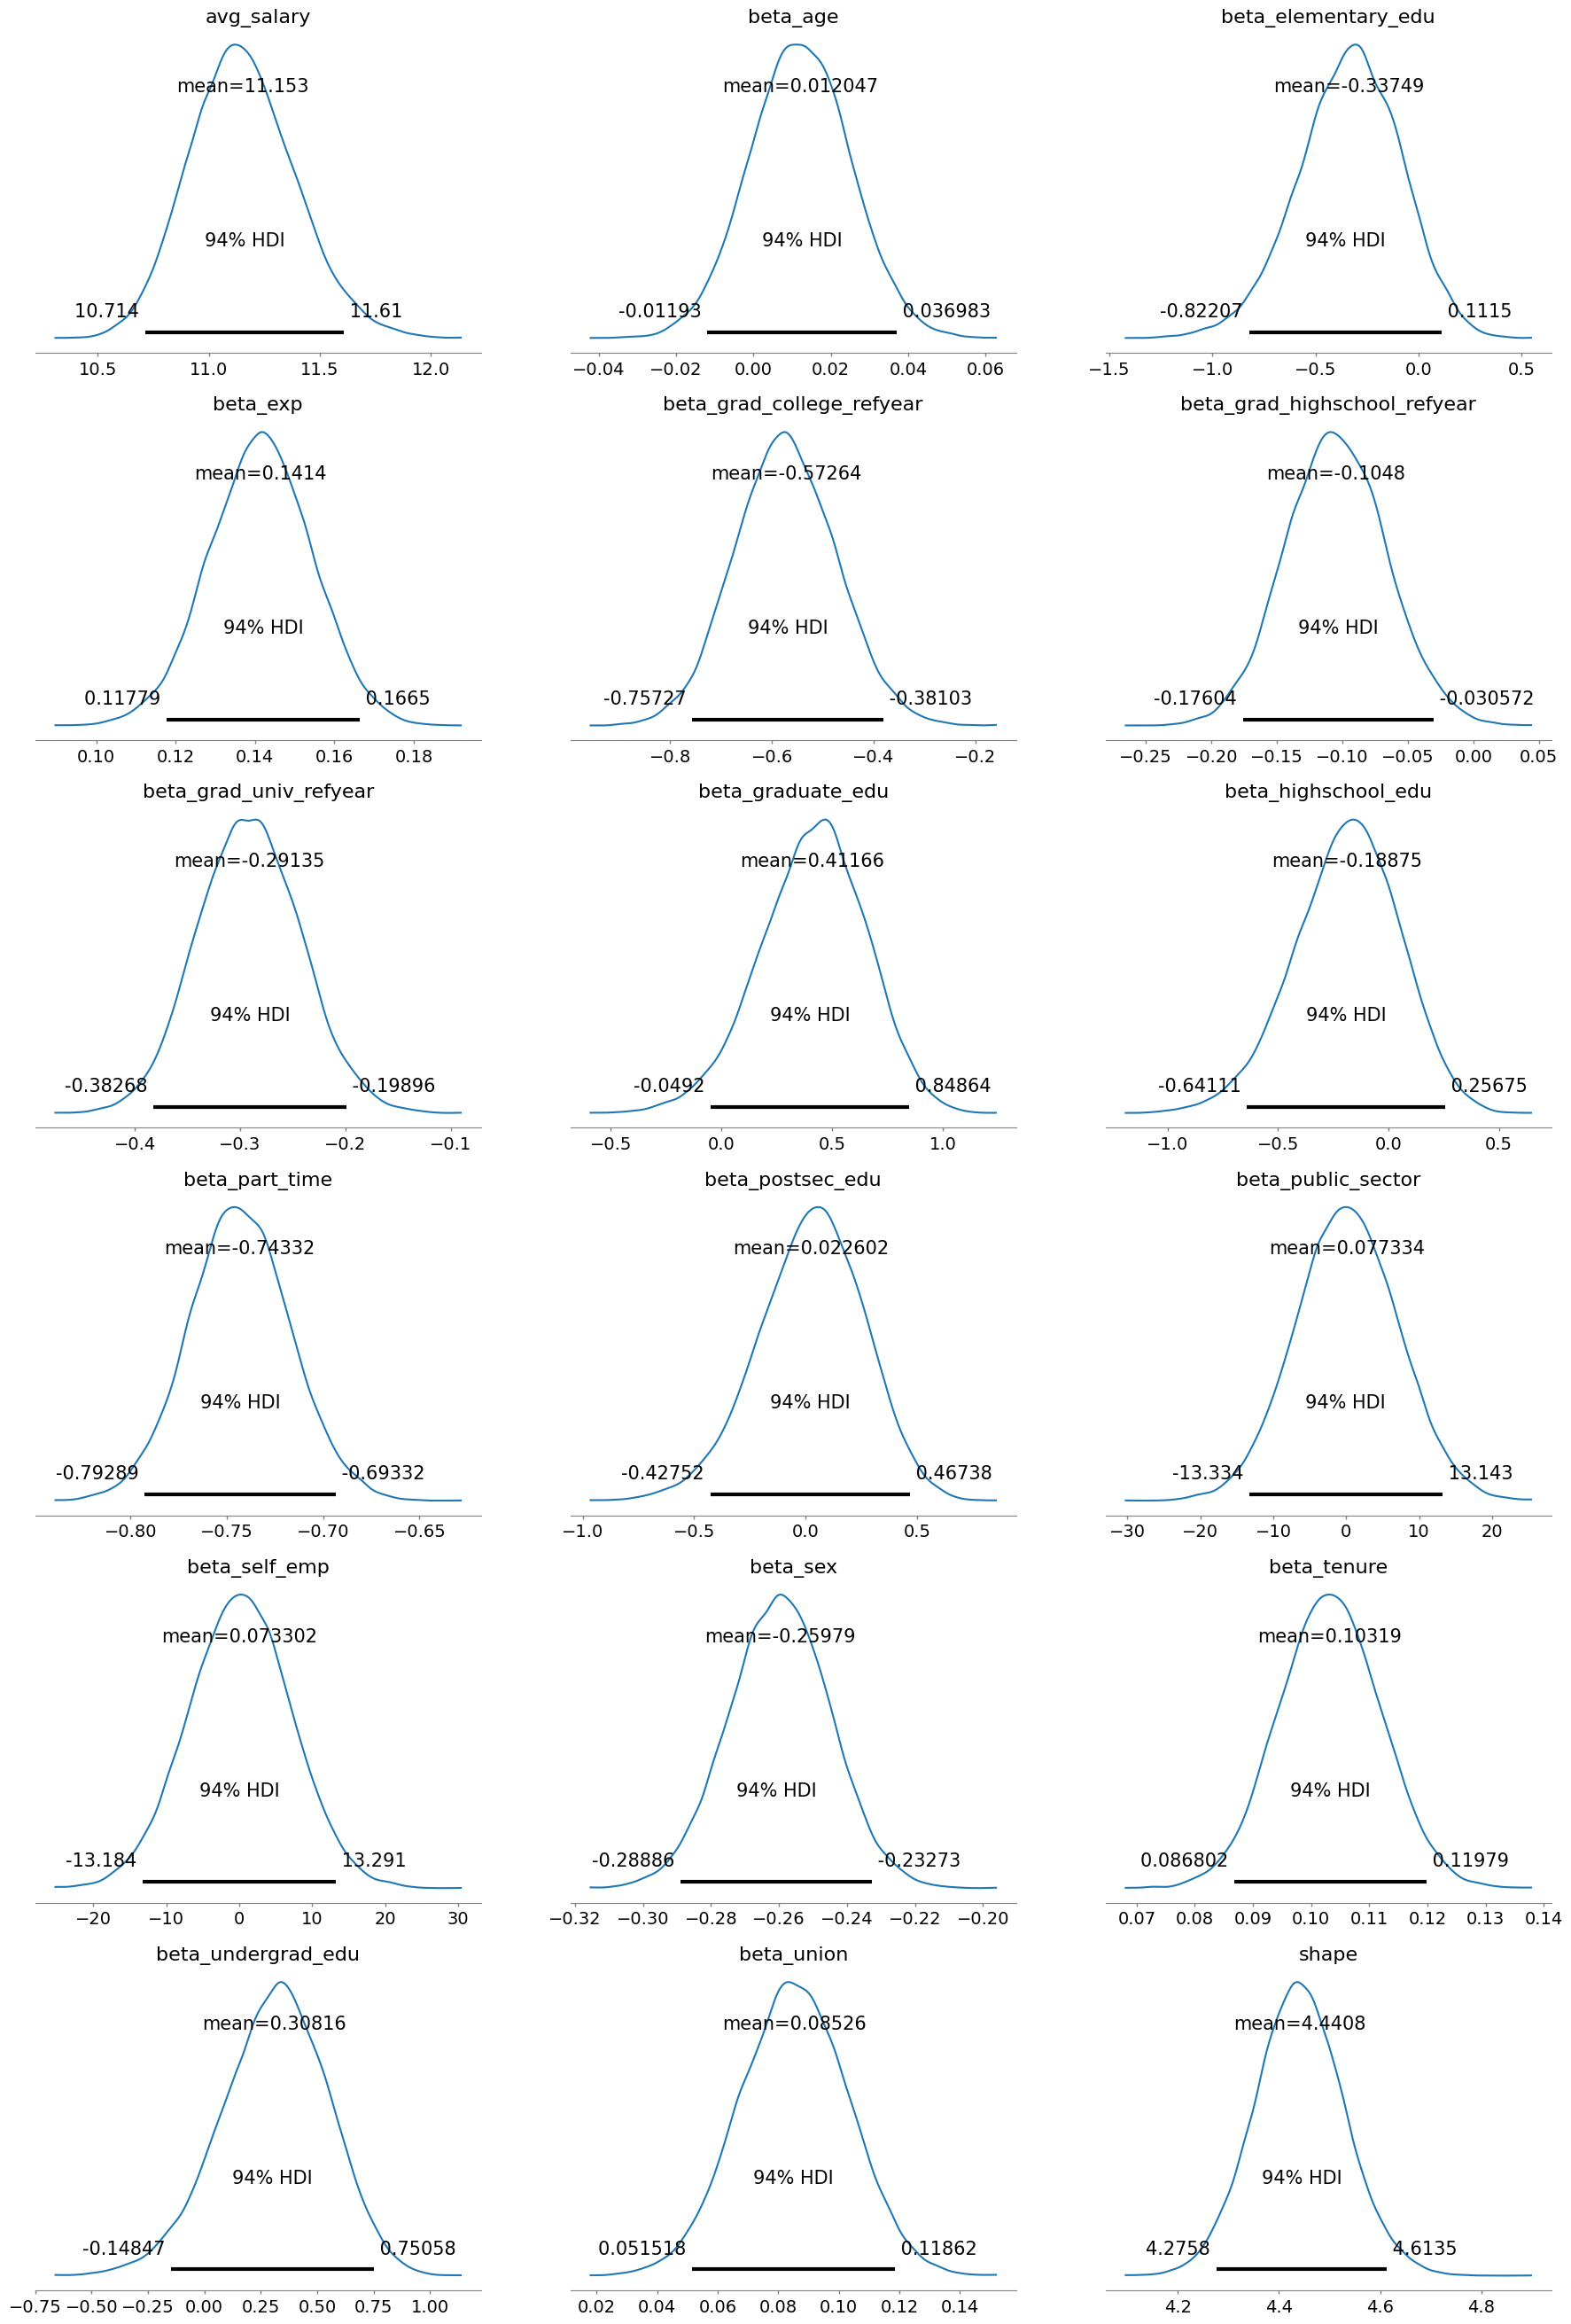

In [44]:
az.plot_posterior(trace, round_to=5);

## Bayesian Lasso

In [5]:
# Import and prepare data
data = pd.read_csv('../datasets/model_dataset.csv')
dataset = data.query('year >= 2005').copy()

dataset["exp"] = (dataset["exp"] - dataset["exp"].mean()) / dataset["exp"].std()
dataset["age"] = (dataset["age"] - dataset["age"].mean()) / dataset["age"].std()
dataset["tenure"] = (dataset["tenure"] - dataset["tenure"].mean()) / dataset["tenure"].std()

# Prepare data for running the model
X = dataset[["exp","sex","elementary_edu", "highschool_edu", "postsec_edu",
             "undergrad_edu", "graduate_edu", "age", "tenure", "union",
             "part_time", "public_sector", "self_emp",
             "grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
# X = dataset[["exp","grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
y = dataset["salary"].values
ind = pd.factorize(dataset["industry"])[0]

In [6]:
def model(X, y, ind):
    # avg_salary = numpyro.sample("avg_salary", dist.Normal(10, 10))
    # beta_exp = numpyro.sample("beta_exp", dist.Normal(0, 10))
    # beta_elementary_edu = numpyro.sample("beta_elementary_edu", dist.Normal(0, 10))
    avg_salary = numpyro.sample("avg_salary", dist.Laplace(0, 0.001))
    beta_exp = numpyro.sample("beta_exp", dist.Laplace(0, 0.001))
    beta_grad_highschool_refyear = numpyro.sample("beta_grad_highschool_refyear", dist.Laplace(0, 0.001))
    beta_grad_college_refyear = numpyro.sample("beta_grad_college_refyear", dist.Laplace(0, 0.001))
    beta_grad_univ_refyear = numpyro.sample("beta_grad_univ_refyear", dist.Laplace(0, 0.001))

    shape = numpyro.sample("shape", dist.Uniform(0, 10))

    mu = jnp.dot(X, jnp.array([beta_exp, beta_grad_highschool_refyear, beta_grad_college_refyear, beta_grad_univ_refyear])) + avg_salary
    mu = jnp.exp(mu)
    rate = shape/mu

    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)

In [43]:
def hierarchical(X, y, ind):
    # Hyperpriors
    mu_avg_salary = numpyro.sample("mu_avg_salary", dist.Laplace(0, 0.001))
    sigma_avg_salary = numpyro.sample("sigma_avg_salary", dist.HalfNormal(0.001))
    mu_beta_exp = numpyro.sample("mu_beta_exp", dist.Laplace(0, 0.001))
    sigma_beta_exp = numpyro.sample("sigma_beta_exp", dist.HalfNormal(0.001))
    mu_beta_sex = numpyro.sample("mu_beta_sex", dist.Laplace(0, 0.001))
    sigma_beta_sex = numpyro.sample("sigma_beta_sex", dist.HalfNormal(0.001))
    mu_beta_elementary_edu = numpyro.sample("mu_beta_elementary_edu", dist.Laplace(0, 0.001))
    sigma_beta_elementary_edu = numpyro.sample("sigma_beta_elementary_edu", dist.HalfNormal(0.001))
    mu_beta_highschool_edu = numpyro.sample("mu_beta_highschool_edu", dist.Laplace(0, 0.001))
    sigma_beta_highschool_edu = numpyro.sample("sigma_beta_highschool_edu", dist.HalfNormal(0.001))
    mu_beta_postsec_edu = numpyro.sample("mu_beta_postsec_edu", dist.Laplace(0, 0.001))
    sigma_beta_postsec_edu = numpyro.sample("sigma_beta_postsec_edu", dist.HalfNormal(0.001))
    mu_beta_undergrad_edu = numpyro.sample("mu_beta_undergrad_edu", dist.Laplace(0, 0.001))
    sigma_beta_undergrad_edu = numpyro.sample("sigma_beta_undergrad_edu", dist.HalfNormal(0.001))
    mu_beta_graduate_edu = numpyro.sample("mu_beta_graduate_edu", dist.Laplace(0, 0.001))
    sigma_beta_graduate_edu = numpyro.sample("sigma_beta_graduate_edu", dist.HalfNormal(0.001))
    mu_beta_age = numpyro.sample("mu_beta_age", dist.Laplace(0, 0.001))
    sigma_beta_age = numpyro.sample("sigma_beta_age", dist.HalfNormal(0.001))
    mu_beta_tenure = numpyro.sample("mu_beta_tenure", dist.Laplace(0, 0.001))
    sigma_beta_tenure = numpyro.sample("sigma_beta_tenure", dist.HalfNormal(0.001))
    mu_beta_union = numpyro.sample("mu_beta_union", dist.Laplace(0, 0.001))
    sigma_beta_union = numpyro.sample("sigma_beta_union", dist.HalfNormal(0.001))
    mu_beta_part_time = numpyro.sample("mu_beta_part_time", dist.Laplace(0, 0.001))
    sigma_beta_part_time = numpyro.sample("sigma_beta_part_time", dist.HalfNormal(0.001))
    mu_beta_public_sector = numpyro.sample("mu_beta_public_sector", dist.Laplace(0, 0.001))
    sigma_beta_public_sector = numpyro.sample("sigma_beta_public_sector", dist.HalfNormal(0.001))
    mu_beta_self_emp = numpyro.sample("mu_beta_self_emp", dist.Laplace(0, 0.001))
    sigma_beta_self_emp = numpyro.sample("sigma_beta_self_emp", dist.HalfNormal(0.001))
    mu_beta_grad_highschool_refyear = numpyro.sample("mu_beta_grad_highschool_refyear", dist.Laplace(0, 0.001))
    sigma_beta_grad_highschool_refyear = numpyro.sample("sigma_beta_grad_highschool_refyear", dist.HalfNormal(0.001))
    mu_beta_grad_college_refyear = numpyro.sample("mu_beta_grad_college_refyear", dist.Laplace(0, 0.001))
    sigma_beta_grad_college_refyear = numpyro.sample("sigma_beta_grad_college_refyear", dist.HalfNormal(0.001))
    mu_beta_grad_univ_refyear = numpyro.sample("mu_beta_grad_univ_refyear", dist.Laplace(0, 0.001))
    sigma_beta_grad_univ_refyear = numpyro.sample("sigma_beta_grad_univ_refyear", dist.HalfNormal(0.001))

    # Priors
    with numpyro.plate("industry", ind.max() + 1):
        avg_salary_offset = numpyro.sample("offset_avg_salary", dist.Normal(0, 1))
        avg_salary = numpyro.deterministic("avg_salary", mu_avg_salary + sigma_avg_salary * avg_salary_offset)
        beta_exp_offset = numpyro.sample("offset_beta_exp", dist.Normal(0, 1))
        beta_exp = numpyro.deterministic("beta_exp", mu_beta_exp + sigma_beta_exp * beta_exp_offset)
        beta_sex_offset = numpyro.sample("offset_beta_sex", dist.Normal(0, 1))
        beta_sex = numpyro.deterministic("beta_sex", mu_beta_sex + sigma_beta_sex * beta_sex_offset)
        beta_elementary_edu_offset = numpyro.sample("offset_beta_elementary_edu", dist.Normal(0, 1))
        beta_elementary_edu = numpyro.deterministic("beta_elementary_edu", mu_beta_elementary_edu + sigma_beta_elementary_edu * beta_elementary_edu_offset)
        beta_highschool_edu_offset = numpyro.sample("offset_beta_highschool_edu", dist.Normal(0, 1))
        beta_highschool_edu = numpyro.deterministic("beta_highschool_edu", mu_beta_highschool_edu + sigma_beta_highschool_edu * beta_highschool_edu_offset)
        beta_postsec_edu_offset = numpyro.sample("offset_beta_postsec_edu", dist.Normal(0, 1))
        beta_postsec_edu = numpyro.deterministic("beta_postsec_edu", mu_beta_postsec_edu + sigma_beta_postsec_edu * beta_postsec_edu_offset)
        beta_undergrad_edu_offset = numpyro.sample("offset_beta_undergrad_edu", dist.Normal(0, 1))
        beta_undergrad_edu = numpyro.deterministic("beta_undergrad_edu", mu_beta_undergrad_edu + sigma_beta_undergrad_edu * beta_undergrad_edu_offset)
        beta_graduate_edu_offset = numpyro.sample("offset_beta_graduate_edu", dist.Normal(0, 1))
        beta_graduate_edu = numpyro.deterministic("beta_graduate_edu", mu_beta_graduate_edu + sigma_beta_graduate_edu * beta_graduate_edu_offset)
        beta_age_offset = numpyro.sample("offset_beta_age", dist.Normal(0, 1))
        beta_age = numpyro.deterministic("beta_age", mu_beta_age + sigma_beta_age * beta_age_offset)
        beta_tenure_offset = numpyro.sample("offset_beta_tenure", dist.Normal(0, 1))
        beta_tenure = numpyro.deterministic("beta_tenure", mu_beta_tenure + sigma_beta_tenure * beta_tenure_offset)
        beta_union_offset = numpyro.sample("offset_beta_union", dist.Normal(0, 1))
        beta_union = numpyro.deterministic("beta_union", mu_beta_union + sigma_beta_union * beta_union_offset)
        beta_part_time_offset = numpyro.sample("offset_beta_part_time", dist.Normal(0, 1))
        beta_part_time = numpyro.deterministic("beta_part_time", mu_beta_part_time + sigma_beta_part_time * beta_part_time_offset)
        beta_public_sector_offset = numpyro.sample("offset_beta_public_sector", dist.Normal(0, 1))
        beta_public_sector = numpyro.deterministic("beta_public_sector", mu_beta_public_sector + sigma_beta_public_sector * beta_public_sector_offset)
        beta_self_emp_offset = numpyro.sample("offset_beta_self_emp", dist.Normal(0, 1))
        beta_self_emp = numpyro.deterministic("beta_self_emp", mu_beta_self_emp + sigma_beta_self_emp * beta_self_emp_offset)
        beta_grad_highschool_refyear_offset = numpyro.sample("offset_beta_grad_highschool_refyear", dist.Normal(0, 1))
        beta_grad_highschool_refyear = numpyro.deterministic("beta_grad_highschool_refyear", mu_beta_grad_highschool_refyear + sigma_beta_grad_highschool_refyear * beta_grad_highschool_refyear_offset)
        beta_grad_college_refyear_offset = numpyro.sample("offset_beta_grad_college_refyear", dist.Normal(0, 1))
        beta_grad_college_refyear = numpyro.deterministic("beta_grad_college_refyear", mu_beta_grad_college_refyear + sigma_beta_grad_college_refyear * beta_grad_college_refyear_offset)
        beta_grad_univ_refyear_offset = numpyro.sample("offset_beta_grad_univ_refyear", dist.Normal(0, 1))
        beta_grad_univ_refyear = numpyro.deterministic("beta_grad_univ_refyear", mu_beta_grad_univ_refyear + sigma_beta_grad_univ_refyear * beta_grad_univ_refyear_offset)
    shape = numpyro.sample("shape", dist.Uniform(0, 10))

    # mu = avg_salary[ind] + jnp.dot(X, jnp.array([beta_exp[ind], beta_sex[ind], beta_elementary_edu[ind], beta_highschool_edu[ind], 
    #                                                 beta_postsec_edu[ind], beta_undergrad_edu[ind], beta_graduate_edu[ind], beta_age[ind],
    #                                                 beta_tenure[ind], beta_union[ind], beta_part_time[ind], beta_public_sector[ind],
    #                                                 beta_self_emp[ind], beta_grad_highschool_refyear[ind], beta_grad_college_refyear[ind],
    #                                                 beta_grad_univ_refyear[ind]]))
    # mu = jnp.exp(mu)
    # rate = shape/mu

    # Expected value
    mu = (avg_salary[ind] + beta_exp[ind] * X[:,0] + beta_sex[ind] * X[:,1] + beta_elementary_edu[ind] * X[:,2]
         + beta_highschool_edu[ind] * X[:,3] + beta_postsec_edu[ind] * X[:,4] + beta_undergrad_edu[ind] * X[:,5]
            + beta_graduate_edu[ind] * X[:,6] + beta_age[ind] * X[:,7] + beta_tenure[ind] * X[:,8] + beta_union[ind] * X[:,9]
            + beta_part_time[ind] * X[:,10] + beta_public_sector[ind] * X[:,11] + beta_self_emp[ind] * X[:,12]
            + beta_grad_highschool_refyear[ind] * X[:,13] + beta_grad_college_refyear[ind] * X[:,14]
            + beta_grad_univ_refyear[ind] * X[:,15])
    mu = jnp.exp(mu)
    rate = shape/mu

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)

In [44]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(hierarchical, target_accept_prob=0.95)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y, ind)

sample: 100%|██████████| 2000/2000 [1:25:12<00:00,  2.56s/it]


In [51]:
cpus = jax.devices("cpu")
mcmc._states = jax.device_put(mcmc._states, cpus[0])
mcmc._kwargs = jax.device_put(mcmc._kwargs, cpus[0])
mcmc._states = jax.device_put(mcmc._states, cpus[0])
mcmc._kwargs = jax.device_put(mcmc._kwargs, cpus[0])
mcmc._last_state = jax.device_put(mcmc._last_state, cpus[0])
mcmc._states_flat = jax.device_put(mcmc._states_flat, cpus[0])
mcmc._warmup_state = jax.device_put(mcmc._warmup_state, cpus[0])

In [52]:
mcmc.__dict__.keys()

dict_keys(['sampler', '_sample_field', '_default_fields', 'num_warmup', 'num_samples', 'num_chains', 'thinning', 'postprocess_fn', 'chain_method', 'progress_bar', '_jit_model_args', '_states', '_states_flat', '_last_state', '_warmup_state', '_init_state_cache', '_cache', '_collection_params', '_args', '_kwargs'])

In [53]:
import pickle
with open(fr"model.pickle", "wb") as output_file:
    pickle.dump(mcmc, output_file)

In [54]:
trace = az.from_numpyro(mcmc)

In [55]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
avg_salary[0]             10.745  0.015  10.716   10.773        0.0      0.0   
avg_salary[1]             11.174  0.011  11.153   11.194        0.0      0.0   
avg_salary[2]             11.232  0.008  11.217   11.246        0.0      0.0   
avg_salary[3]             11.290  0.011  11.268   11.310        0.0      0.0   
avg_salary[4]             11.145  0.013  11.120   11.168        0.0      0.0   
...                          ...    ...     ...      ...        ...      ...   
sigma_beta_self_emp        0.001  0.001   0.000    0.002        0.0      0.0   
sigma_beta_sex             0.002  0.001   0.000    0.004        0.0      0.0   
sigma_beta_tenure          0.003  0.002   0.000    0.005        0.0      0.0   
sigma_beta_undergrad_edu   0.001  0.001   0.000    0.002        0.0      0.0   
sigma_beta_union           0.001  0.001   0.000    0.003        0.0      0.0   

                          ess_bulk  ess_tail  r_hat  
avg_salary[0]               3419.0    3052.0   1.00  
avg_salary[1]               2599.0    2953.0   1.00  
avg_salary[2]               3573.0    3029.0   1.00  
avg_salary[3]               4453.0    3108.0   1.00  
avg_salary[4]               4612.0    2919.0   1.00  
...                            ...       ...    ...  
sigma_beta_self_emp         2956.0    1421.0   1.00  
sigma_beta_sex              1465.0    1816.0   1.00  
sigma_beta_tenure            292.0     701.0   1.01  
sigma_beta_undergrad_edu    2200.0    1625.0   1.00  
sigma_beta_union            1839.0    2271.0   1.00  

[579 rows x 9 columns]

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (69), generating only 20 plots
  warnings.warn(


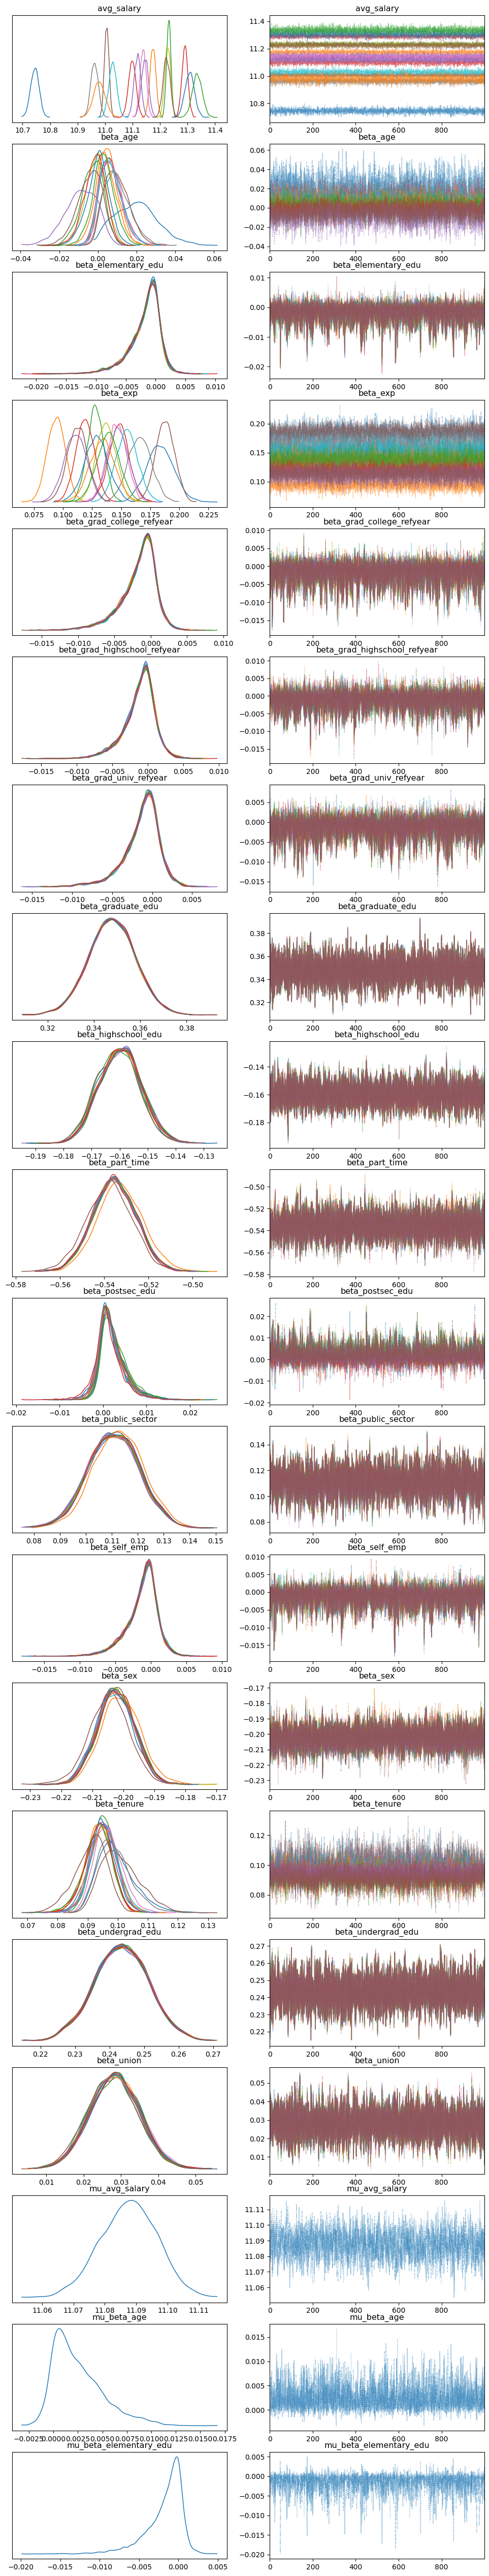

In [56]:
az.plot_trace(trace, combined=True, figsize=(12, 65));

## Online learning

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from jax.scipy.stats import gaussian_kde
from jax import random
import jax.numpy as jnp
import numpyro

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
from numpyro.distributions import Distribution
from numpyro.distributions.constraints import real

In [21]:
import warnings
warnings.filterwarnings("ignore")

True mean: -0.01 - Estimated mean: 0.05


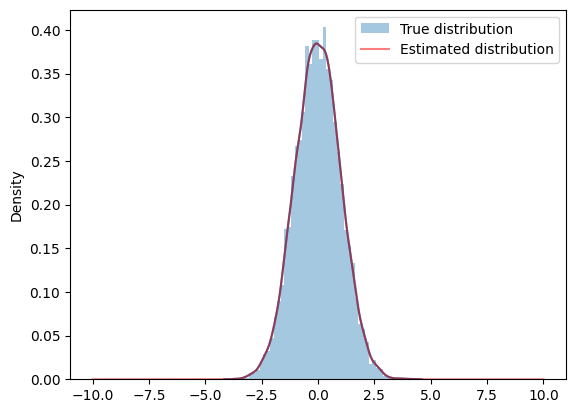

In [22]:
data = np.random.normal(0, 1, 10000)
x = np.linspace(-10, 10, 10000)
kde = gaussian_kde(data)
fig, ax = plt.subplots()
sns.distplot(data, label='True distribution', kde=True, norm_hist=True);
sns.lineplot(x=x, y=kde.evaluate(x), alpha=0.5, ax=ax, color='red', label='Estimated distribution');
print(f"True mean: {data.mean():.2f} - Estimated mean: {kde.evaluate(x).mean():.2f}")

In [61]:
class CustomDistribution(Distribution):
    support = real
    def __init__(self, dataset, batch_shape=(), event_shape=()):
        self.kde = gaussian_kde(dataset)
        self._batch_shape = batch_shape
        self._event_shape = event_shape

    def sample(self, key, sample_shape=()):
        return self.kde.resample(sample_shape[0]).T[0]

    def log_prob(self, value):
        return jnp.log(self.kde.evaluate(value))

In [23]:
x = np.random.uniform(0, 1, 1000)
y = 2 + 3 * x + np.random.normal(0, 1, 1000)

In [57]:
def model(x, y):
    alpha = numpyro.sample("alpha", dist.Normal(0, 10))
    beta = numpyro.sample("beta", dist.Normal(0, 10))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10))
    mu = alpha + beta * x
    numpyro.sample("y_hat", dist.Normal(mu, sigma), obs=y)

def custom_model(x, y, samples):
    alpha = numpyro.sample("alpha", CustomDistribution(samples))
    beta = numpyro.sample("beta", dist.Normal(0, 10))
    sigma = numpyro.sample("sigma", dist.HalfNormal(10))
    mu = alpha + beta * x
    numpyro.sample("y_hat", dist.Normal(mu, sigma), obs=y)

In [60]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(custom_model, target_accept_prob=0.95)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, x, y, np.random.normal(3, 1, 1000))
mcmc.print_summary()

sample: 100%|██████████| 2000/2000 [00:11<00:00, 174.62it/s]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     alpha      1.91      0.07      1.91      1.81      2.03   1374.21      1.00
      beta      3.08      0.11      3.08      2.90      3.27   1351.14      1.00
     sigma      1.00      0.02      1.00      0.97      1.04   2011.50      1.00

Number of divergences: 0


In [35]:
import jax.numpy as jnp
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax.random as random
from jax.scipy.stats import gaussian_kde

class CustomDistribution(Distribution):
    support = real

    def __init__(self, dataset, batch_shape=(), event_shape=()):
        self.kde = gaussian_kde(dataset)
        self._batch_shape = batch_shape
        self._event_shape = event_shape

    def sample(self, key, sample_shape=()):
        # Generate samples from the distribution
        return self.kde.resample(sample_shape[0]).T[0]

    def log_prob(self, value):
        # Compute the log probability of a given sample
        return jnp.log(self.kde.evaluate(value))

def basic_model(X1, X2, Y):
    alpha = numpyro.sample("alpha", dist.Normal(0, 1))
    beta0 = numpyro.sample("beta0", dist.Normal(12, 1))
    beta1 = numpyro.sample("beta1", dist.Normal(18, 1))
    mu = alpha + beta0 * X1 + beta1 * X2
    numpyro.sample("Y_obs", dist.Normal(mu, 1), obs=Y)


def from_posterior(param, samples):
    xmin, xmax = jnp.min(samples), jnp.max(samples)
    x = jnp.linspace(xmin, xmax, 100)
    kde = gaussian_kde(samples)
    y = kde.evaluate(x)
    return Interpolated(x, y)

# Initialize some data
size = 100  # Replace with the actual size
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2
Y = np.random.randn(size)  # Replace with the actual Y

# Run initial MCMC
kernel = NUTS(basic_model)
mcmc = MCMC(kernel, num_warmup=100, num_samples=100)
mcmc.run(rng_key, jnp.array(X1), jnp.array(X2), jnp.array(Y))
trace = mcmc.get_samples()

# Online learning
for _ in range(10):
    X1 = np.random.randn(size)
    X2 = np.random.randn(size) * 0.2
    Y = np.random.randn(size)  # Update with new Y
    
    def updated_model(X1, X2, Y):
        alpha = numpyro.sample("alpha", from_posterior("alpha", trace["alpha"]))
        beta0 = numpyro.sample("beta0", from_posterior("beta0", trace["beta0"]))
        beta1 = numpyro.sample("beta1", from_posterior("beta1", trace["beta1"]))
        mu = alpha + beta0 * X1 + beta1 * X2
        numpyro.sample("Y_obs", dist.Normal(mu, 1), obs=Y)
    
    kernel = NUTS(updated_model)
    mcmc = MCMC(kernel, num_warmup=200, num_samples=200)
    mcmc.run(rng_key, jnp.array(X1), jnp.array(X2), jnp.array(Y))
    trace = mcmc.get_samples()


  0%|          | 0/200 [00:00<?, ?it/s]

sample:  59%|█████▉    | 237/400 [02:30<01:43,  1.57it/s, 1023 steps of size 1.44e-03. acc. prob=0.87]


KeyboardInterrupt: 

In [1]:
import jax

In [4]:
jax.devices("cpu")

[CpuDevice(id=0)]

In [5]:
jax.devices("gpu")

[gpu(id=0)]

In [69]:
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro import handlers
import matplotlib.pyplot as plt
import seaborn as sns

def model():
    a = numpyro.sample("a", dist.Laplace(0, 0.1))
    b = numpyro.sample("b", dist.HalfNormal(1))


# Generate a random key
rng_key = random.PRNGKey(0)

# Use the seed and trace handlers
with handlers.seed(rng_seed=rng_key), handlers.trace() as tr:
    model()

# Print the shapes
prior_samples = {}
for name, site in tr.items():
    prior_samples[name] = site['fn'].sample(rng_key, (10000,))

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

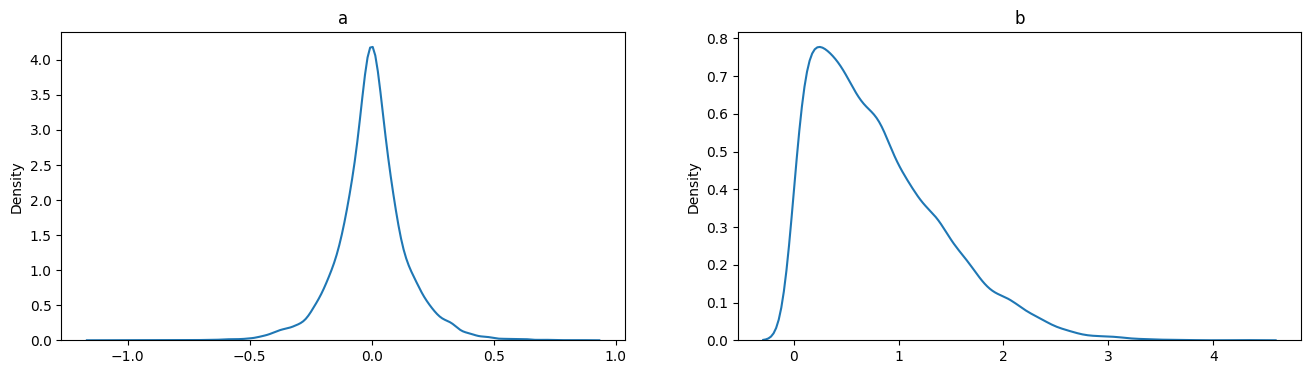

In [70]:
# Plot kde of each sample
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
for i, (name, value) in enumerate(prior_samples.items()):
    sns.kdeplot(value.flatten(), ax=ax[i])
    ax[i].set_title(name)